In [1]:
from shapely.geometry import Point
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
better_health = pd.read_csv('../data/Local_Data_for_Better_Health.csv')

In [3]:
better_health.head(2)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,IL,Illinois,Chicago,Census Tract,BRFSS,Health Outcomes,1714000-17031612000,All teeth lost among adults aged >=65 Years,%,...,39.9,NaN,NaN,"1,545","(41.7978467034, -87.6525358919)",HLTHOUT,TEETHLOST,1714000.0,1.703161e+10,Teeth Loss
1,2016,IL,Illinois,Chicago,Census Tract,BRFSS,Prevention,1714000-17031660700,Visits to dentist or dental clinic among adult...,%,...,46.3,NaN,NaN,"2,366","(41.7738453587, -87.6810954614)",PREVENT,DENTAL,1714000.0,1.703166e+10,Dental Visit


In [4]:
better_health.columns

Index(['Year', 'StateAbbr', 'StateDesc', 'CityName', 'GeographicLevel',
       'DataSource', 'Category', 'UniqueID', 'Measure', 'Data_Value_Unit',
       'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount',
       'GeoLocation', 'CategoryID', 'MeasureId', 'CityFIPS', 'TractFIPS',
       'Short_Question_Text'],
      dtype='object')

In [5]:
better_health_TN = better_health[better_health['StateAbbr'] == 'TN']

In [6]:
better_health_TN.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
295216,2017,TN,Tennessee,Nashville,Census Tract,BRFSS,Health Outcomes,4752006-47037010402,Stroke among adults aged >=18 Years,%,...,4.9,NaN,NaN,"5,588","(36.2681195238, -86.6959751266)",HLTHOUT,STROKE,4752006.0,4.703701e+10,Stroke
412622,2016,TN,Tennessee,Chattanooga,City,BRFSS,Prevention,4714000,Mammography use among women aged 50–74 Years,%,...,80.2,NaN,NaN,"167,674","(35.0662472165, -85.2466771892)",PREVENT,MAMMOUSE,4714000.0,NaN,Mammography
412623,2017,TN,Tennessee,Chattanooga,City,BRFSS,Health Outcomes,4714000,Stroke among adults aged >=18 Years,%,...,4.2,NaN,NaN,"167,674","(35.0662472165, -85.2466771892)",HLTHOUT,STROKE,4714000.0,NaN,Stroke
412627,2017,TN,Tennessee,Knoxville,Census Tract,BRFSS,Unhealthy Behaviors,4740000-47093004700,Binge drinking among adults aged >=18 Years,%,...,16.0,NaN,NaN,"3,215","(35.9869092387, -84.0157259847)",UNHBEH,BINGE,4740000.0,4.709300e+10,Binge Drinking
412628,2017,TN,Tennessee,Knoxville,City,BRFSS,Health Outcomes,4740000,Current asthma among adults aged >=18 Years,%,...,10.8,NaN,NaN,"178,874","(35.9690594531, -83.9495877264)",HLTHOUT,CASTHMA,4740000.0,NaN,Current Asthma


In [7]:
better_health_TN.shape

(15299, 24)

In [8]:
better_health_TN.Category.unique()

array(['Health Outcomes', 'Prevention', 'Unhealthy Behaviors'],
      dtype=object)

In [9]:
better_health_TN.Measure.unique()

array(['Stroke among adults aged >=18 Years',
       'Mammography use among women aged 50–74 Years',
       'Binge drinking among adults aged >=18 Years',
       'Current asthma among adults aged >=18 Years',
       'Sleeping less than 7 hours among adults aged >=18 Years',
       'Chronic kidney disease among adults aged >=18 Years',
       'Coronary heart disease among adults aged >=18 Years',
       'Arthritis among adults aged >=18 Years',
       'Visits to dentist or dental clinic among adults aged >=18 Years',
       'Diagnosed diabetes among adults aged >=18 Years',
       'Papanicolaou smear use among adult women aged 21–65 Years',
       'No leisure-time physical activity among adults aged >=18 Years',
       'Visits to doctor for routine checkup within the past Year among adults aged >=18 Years',
       'Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure',
       'Obesity among adults aged >=18 Years',
       'Fecal occult bl

In [10]:
better_health_TN_all_teeth_lost = better_health_TN[better_health_TN['Measure'] == 'All teeth lost among adults aged >=65 Years']

In [11]:
better_health_TN_all_teeth_lost.head(50)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
750046,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065000800,All teeth lost among adults aged >=65 Years,%,...,22.9,NaN,NaN,"1,348","(35.0684524247, -85.3130794178)",HLTHOUT,TEETHLOST,4714000.0,4.706500e+10,Teeth Loss
750533,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065011447,All teeth lost among adults aged >=65 Years,%,...,NaN,*,Estimates suppressed for population less than 50,2,"(35.081133042, -85.088383777)",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss
750642,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065011323,All teeth lost among adults aged >=65 Years,%,...,16.1,NaN,NaN,"2,436","(35.0410360489, -85.1376242788)",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss
750863,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065010700,All teeth lost among adults aged >=65 Years,%,...,NaN,*,Estimates suppressed for population less than 50,4,"(35.1040841376, -85.2901543882)",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss
750942,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065002800,All teeth lost among adults aged >=65 Years,%,...,15.3,NaN,NaN,"3,647","(35.0175125444, -85.2453135796)",HLTHOUT,TEETHLOST,4714000.0,4.706500e+10,Teeth Loss
750957,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065001300,All teeth lost among adults aged >=65 Years,%,...,40.6,NaN,NaN,"2,064","(35.0274450654, -85.2672960804)",HLTHOUT,TEETHLOST,4714000.0,4.706500e+10,Teeth Loss
751041,2016,TN,Tennessee,Clarksville,Census Tract,BRFSS,Health Outcomes,4715160-47125101201,All teeth lost among adults aged >=65 Years,%,...,24.6,NaN,NaN,"2,108","(36.5781178441, -87.4223987924)",HLTHOUT,TEETHLOST,4715160.0,4.712510e+10,Teeth Loss
751067,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065010413,All teeth lost among adults aged >=65 Years,%,...,14.2,NaN,NaN,461,"(35.149607985, -85.1904084131)",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss
751177,2016,TN,Tennessee,Clarksville,Census Tract,BRFSS,Health Outcomes,4715160-47125101803,All teeth lost among adults aged >=65 Years,%,...,17.5,NaN,NaN,"2,907","(36.5138929807, -87.2441267793)",HLTHOUT,TEETHLOST,4715160.0,4.712510e+10,Teeth Loss
751511,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065011411,All teeth lost among adults aged >=65 Years,%,...,20.4,NaN,NaN,"3,910","(35.0949695099, -85.2164930176)",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss


In [12]:
better_health_TN_all_teeth_lost.shape

(534, 24)

In [13]:
smile_on = pd.read_csv('../data/SmileOn.csv', skiprows = 2, encoding = "ISO-8859-1", low_memory=False)

In [14]:
smile_on.head(2)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,NaN,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,NaN,NaN,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,NaN,11/25/2020 15:40,11/25/2020 15:55,15,3859755,82341,NaN,NaN,...,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
smile_on.shape

(40032, 184)

In [16]:
smile_on_wip = smile_on

In [17]:
smile_on_wip.columns

Index(['CallReportNum', 'ReportVersion', 'LinkedToCallReportNum',
       'CallDateAndTimeStart', 'CallDateAndTimeEnd', 'CallLength', 'CallerNum',
       'PhoneWorkerNum', 'WasRealCall', 'WasHangup',
       ...
       'SMILE ON 60+ Screening - Treatment Urgency',
       'SMILE ON 60+ Screening - Untreated Decay',
       'SMILE ON 60+ Site Information - Enroller ID',
       'SMILE ON 60+ Site Information - Enroller Location',
       'SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab',
       'SMILE ON 60+ Treatment Plan - Is the treatment plan completed?',
       'SMILE ON 60+ Treatment Plan - Was a treatment plan developed?',
       'SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)',
       'SMILE ON 60+ Verification of Eligibility - Transportation Arranged',
       'SMILE ON 60+ Verification of Eligibility - Verification of Eligibility'],
      d

In [18]:
smile_on_wip = smile_on[['CallReportNum','ReportVersion','LinkedToCallReportNum','CallDateAndTimeStart',
                        'CallDateAndTimeEnd','CallLength','CallerNum','PhoneWorkerNum','PhoneType','Narrative',
                        'Feedback','EnteredByWorkerNum','EnteredOn','Reviewed','FeedbackStatus',
                        'FeedbackFromPhoneWorkerNum','FeedbackFromPhoneWorkerName','SMILE ON 60+ Notes (Optional) - Notes',
                        'SMILE ON 60+ Screening - Last Screening Date','SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)',
                        'SMILE ON 60+ Site Information - Enroller ID','SMILE ON 60+ Treatment Plan - Is the treatment plan completed?',
                        'SMILE ON 60+ Treatment Plan - Was a treatment plan developed?',
                        'SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)']]

In [19]:
smile_on_wip.head(20)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,PhoneType,Narrative,...,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,SMILE ON 60+ Notes (Optional) - Notes,SMILE ON 60+ Screening - Last Screening Date,SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply),SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)"
0,81381827,SMILE ON 60+ Registration,NaN,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,NaN,NaN,...,Not yet,NaN,NaN,NaN,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,NaN,11/25/2020 15:40,11/25/2020 15:55,15,3859755,82341,NaN,NaN,...,Not yet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,NaN,11/25/2020 15:02,11/25/2020 15:02,0,2518680,119506,NaN,NaN,...,Not yet,NaN,NaN,NaN,NaN,5650 - Add tooth to existing partial denture - 30,Friends in Need Health Center - Kingsport,Yes,Yes,Yes
3,81375215,SMILE ON 60+ Clinical,NaN,11/25/2020 14:17,11/25/2020 14:17,0,3231923,143703,NaN,NaN,...,Not yet,NaN,NaN,NaN,NaN,No Code - Denture step Mandibular: may be used...,Christ Community Health Services- Frayser,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,NaN,11/25/2020 13:50,11/25/2020 13:58,8,-1,135611,NaN,NaN,...,Not yet,NaN,NaN,NaN,11/25/2020,NaN,Neighborhood Health - Lebanon,NaN,Yes,No
5,81371535,SMILE ON 60+ Clinical,NaN,11/25/2020 13:04,11/25/2020 13:04,0,3605119,119506,NaN,NaN,...,Not yet,NaN,NaN,NaN,NaN,No Code - Denture step Mandibular: may be used...,Friends in Need Health Center - Kingsport,No,Yes,NaN
6,81371527,SMILE ON 60+ Clinical,NaN,11/25/2020 13:03,11/25/2020 13:04,1,3859184,127206,NaN,NaN,...,Not yet,NaN,NaN,NaN,NaN,NaN,Neighborhood Health - Lebanon,NaN,NaN,NaN
7,81371481,SMILE ON 60+ Clinical,NaN,11/25/2020 13:02,11/25/2020 13:03,1,3746643,119506,NaN,NaN,...,Not yet,NaN,NaN,NaN,NaN,No Code - Denture step Mandibular: may be used...,Friends in Need Health Center - Kingsport,No,Yes,NaN
8,81371365,SMILE ON 60+ Registration,NaN,11/25/2020 13:00,11/25/2020 13:03,3,3859184,127206,NaN,NaN,...,Not yet,NaN,NaN,NaN,NaN,NaN,Neighborhood Health - Lebanon,NaN,NaN,NaN
9,81367388,SMILE ON 60+ Clinical,NaN,11/25/2020 11:46,11/25/2020 11:56,10,3858402,133280,NaN,NaN,...,Not yet,NaN,NaN,Patient will need a comprehensive exam to exam...,11/24/2020,140 - Limited Oral evaluation - problem focuse...,Christ Community Health Services- Raleigh,Yes,No,NaN


In [20]:
smile_on_wip = smile_on_wip.rename(columns = {'SMILE 60+ Site Information - Enroller ID': 'SMILE_Site_Information_Enroller_ID'})
smile_on_wip.head()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,PhoneType,Narrative,...,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,SMILE ON 60+ Notes (Optional) - Notes,SMILE ON 60+ Screening - Last Screening Date,SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply),SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)"
0,81381827,SMILE ON 60+ Registration,NaN,11/25/2020 16:46,11/25/2020 16:48,2,3859874,136529,NaN,NaN,...,Not yet,NaN,NaN,NaN,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,NaN,11/25/2020 15:40,11/25/2020 15:55,15,3859755,82341,NaN,NaN,...,Not yet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,NaN,11/25/2020 15:02,11/25/2020 15:02,0,2518680,119506,NaN,NaN,...,Not yet,NaN,NaN,NaN,NaN,5650 - Add tooth to existing partial denture - 30,Friends in Need Health Center - Kingsport,Yes,Yes,Yes
3,81375215,SMILE ON 60+ Clinical,NaN,11/25/2020 14:17,11/25/2020 14:17,0,3231923,143703,NaN,NaN,...,Not yet,NaN,NaN,NaN,NaN,No Code - Denture step Mandibular: may be used...,Christ Community Health Services- Frayser,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,NaN,11/25/2020 13:50,11/25/2020 13:58,8,-1,135611,NaN,NaN,...,Not yet,NaN,NaN,NaN,11/25/2020,NaN,Neighborhood Health - Lebanon,NaN,Yes,No


In [21]:
smile_on_wip[['SMILE ON 60+ Treatment Plan - Is the treatment plan completed?']].value_counts()

SMILE ON 60+ Treatment Plan - Is the treatment plan completed?
No                                                                12431
Yes                                                                5104
dtype: int64

In [22]:
smile_on_wip[['SMILE ON 60+ Treatment Plan - Was a treatment plan developed?']].value_counts()

SMILE ON 60+ Treatment Plan - Was a treatment plan developed?
Yes                                                              15930
No                                                                1098
dtype: int64

In [23]:
smile_on_wip[['SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)']].value_counts()

SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)
No                                                                                                                                                                         8127
Yes                                                                                                                                                                        6149
dtype: int64

In [24]:
smile_on[['SMILE ON 60+ Demographic Information - # of People in Household']].value_counts()

SMILE ON 60+ Demographic Information - # of People in Household
1                                                                  24170
2                                                                  10348
3                                                                   2030
4                                                                   1049
5                                                                    563
6                                                                    177
7                                                                    111
1_____                                                                79
8                                                                     53
2_____                                                                35
0                                                                     27
112                                                                   25
9                                                           

In [25]:
#sort by CallDateAndTimeStart column
sort_by_calltime = smile_on.sort_values('CallDateAndTimeStart')
#create a dataframe of all of the first calls
first = sort_by_calltime[sort_by_calltime.duplicated(['CallerNum'])]
sort_by_callnum = first.sort_values('CallerNum')
sort_by_callnum.head(25)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
40020,53706760,SMILE ON 60+ Registration,NaN,6/12/2018 10:36,6/12/2018 10:39,3,-2,116749,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40019,53706630,SMILE ON 60+ Registration,NaN,6/12/2018 10:36,6/12/2018 10:36,0,-2,116749,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
40015,54184987,SMILE ON 60+ Clinical,NaN,6/28/2018 8:21,6/28/2018 8:23,2,-2,117266,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes
40023,53396598,SMILE ON 60+ Clinical,NaN,5/31/2018 14:26,5/31/2018 14:27,1,-2,116749,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40018,53706851,SMILE ON 60+ Clinical,NaN,6/12/2018 10:39,6/12/2018 10:44,5,-2,116749,NaN,NaN,...,Urgent Care - within next week-pain or infection,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes
40016,54184728,SMILE ON 60+ Registration,NaN,6/28/2018 8:09,6/28/2018 8:20,11,-2,117266,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
40017,53707044,SMILE ON 60+ Clinical,NaN,6/12/2018 10:45,6/12/2018 10:45,0,-2,116749,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40014,54186032,SMILE ON 60+ Clinical,NaN,6/28/2018 9:04,6/28/2018 9:05,1,-2,117266,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40012,57949412,SMILE ON 60+ Clinical,NaN,7/1/2018 11:56,7/1/2018 11:59,3,-2,116749,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40013,58239607,SMILE ON 60+ Clinical,NaN,7/1/2018 11:55,7/1/2018 11:56,1,-1,116749,NaN,NaN,...,NaN,NaN,Interfaith Dental Clinic - Nashville,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
sort_by_callnum = first.sort_values('CallLength', ascending = False)

In [27]:
sort_by_callnum.head(10)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,SMILE ON 60+ Screening - Treatment Urgency,SMILE ON 60+ Screening - Untreated Decay,SMILE ON 60+ Site Information - Enroller ID,SMILE ON 60+ Site Information - Enroller Location,SMILE ON 60+ Treatment Plan - Action: Upload After Picture on Finish Tab,SMILE ON 60+ Treatment Plan - Is the treatment plan completed?,SMILE ON 60+ Treatment Plan - Was a treatment plan developed?,"SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",SMILE ON 60+ Verification of Eligibility - Transportation Arranged,SMILE ON 60+ Verification of Eligibility - Verification of Eligibility
38217,56973957,SMILE ON 60+ Registration,NaN,10/9/2018 9:33,10/9/2018 21:45,732,2457649,119507,NaN,NaN,...,NaN,NaN,Friends in Need Health Center - Kingsport,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
35223,60162995,SMILE ON 60+ Registration,NaN,1/8/2019 12:11,1/8/2019 16:49,278,2601359,119494,NaN,NaN,...,NaN,NaN,Matthew Walker - Clarksville,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
2176,79450898,SMILE ON 60+ Clinical,NaN,10/5/2020 12:29,10/5/2020 16:13,224,3577788,133205,NaN,NaN,...,NaN,NaN,Christ Community Health Services- Broad Avenue,Provider Site,NaN,No,Yes,No,NaN,NaN
34527,59886431,SMILE ON 60+ Clinical,NaN,1/30/2019 10:17,1/30/2019 13:33,196,2582814,119488,NaN,NaN,...,NaN,NaN,Neighborhood Health - Lebanon,NaN,NaN,NaN,Yes,NaN,NaN,Yes
37586,57415455,SMILE ON 60+ Clinical,NaN,10/25/2018 12:00,10/25/2018 15:00,180,2474671,119515,NaN,NaN,...,Early care-within next several weeks,No,Neighborhood Health - Eastside/Nashville,NaN,NaN,Yes,Yes,Yes,NaN,Yes
35822,59396814,SMILE ON 60+ Registration,NaN,12/13/2018 13:51,12/13/2018 16:49,178,2568988,119494,NaN,NaN,...,NaN,NaN,Matthew Walker - Clarksville,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
22980,66238689,SMILE ON 60+ Registration,NaN,9/11/2019 12:49,9/11/2019 15:06,137,2889828,119495,NaN,NaN,...,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
25797,65023322,SMILE ON 60+ Clinical,NaN,7/31/2019 10:00,7/31/2019 12:00,120,2790112,119473,NaN,NaN,...,NaN,NaN,Healing Hands Health Center - Bristol,Provider Site,NaN,No,Yes,No,NaN,NaN
458,81371230,SMILE ON 60+ Clinical,NaN,11/11/2020 10:00,11/11/2020 12:00,120,3821801,119472,NaN,NaN,...,NaN,NaN,Healing Hands Health Center - Bristol,Provider Site,NaN,NaN,NaN,NaN,NaN,NaN
18761,68064054,SMILE ON 60+ Clinical,NaN,11/7/2019 15:00,11/7/2019 17:00,120,2976287,119472,NaN,NaN,...,Early care-within next several weeks,Yes,Healing Hands Health Center - Bristol,Provider Site,NaN,No,Yes,NaN,NaN,Yes


In [28]:
repeat = smile_on["CallerNum"].value_counts()
dif = repeat.value_counts()
dif
dif.sum() -  2030

6678

In [29]:
zipcodes_tn = gpd.read_file('../data/tn_zipcodes.json')
print(zipcodes_tn.crs)
zipcodes_tn.head( )

epsg:4326


,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,47,37710,4737710,B5,G6350,S,211712025,0,+36.1586321,-084.3161341,N,"POLYGON ((-84.27434 36.13099, -84.27447 36.130..."
1,47,37381,4737381,B5,G6350,S,360489702,38482384,+35.6871804,-084.8769930,N,"POLYGON ((-84.80164 35.76971, -84.80163 35.769..."
2,47,37701,4737701,B5,G6350,S,27309005,28530,+35.7927401,-083.9860671,N,"POLYGON ((-83.98049 35.82693, -83.98045 35.826..."
3,47,37886,4737886,B5,G6350,S,113625372,0,+35.7455878,-083.8047184,N,"POLYGON ((-83.89972 35.67276, -83.89920 35.672..."
4,47,37757,4737757,B5,G6350,S,72942123,8907166,+36.2990089,-084.1372987,N,"MULTIPOLYGON (((-84.15754 36.35430, -84.15683 ..."


In [30]:
zipcodes_tn.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   631 non-null    object  
 1   ZCTA5CE10   631 non-null    object  
 2   GEOID10     631 non-null    object  
 3   CLASSFP10   631 non-null    object  
 4   MTFCC10     631 non-null    object  
 5   FUNCSTAT10  631 non-null    object  
 6   ALAND10     631 non-null    int64   
 7   AWATER10    631 non-null    int64   
 8   INTPTLAT10  631 non-null    object  
 9   INTPTLON10  631 non-null    object  
 10  PARTFLG10   631 non-null    object  
 11  geometry    631 non-null    geometry
dtypes: geometry(1), int64(2), object(9)
memory usage: 59.3+ KB


In [31]:
zipcodes_tn = zipcodes_tn.rename(columns = {'ZCTA5CE10':'zip', 'INTPTLAT10':'lat', 'INTPTLON10':'lng'})
zipcodes_tn.head()

,STATEFP10,zip,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,lat,lng,PARTFLG10,geometry
0,47,37710,4737710,B5,G6350,S,211712025,0,+36.1586321,-084.3161341,N,"POLYGON ((-84.27434 36.13099, -84.27447 36.130..."
1,47,37381,4737381,B5,G6350,S,360489702,38482384,+35.6871804,-084.8769930,N,"POLYGON ((-84.80164 35.76971, -84.80163 35.769..."
2,47,37701,4737701,B5,G6350,S,27309005,28530,+35.7927401,-083.9860671,N,"POLYGON ((-83.98049 35.82693, -83.98045 35.826..."
3,47,37886,4737886,B5,G6350,S,113625372,0,+35.7455878,-083.8047184,N,"POLYGON ((-83.89972 35.67276, -83.89920 35.672..."
4,47,37757,4737757,B5,G6350,S,72942123,8907166,+36.2990089,-084.1372987,N,"MULTIPOLYGON (((-84.15754 36.35430, -84.15683 ..."


In [32]:
zipcodes_tn['lat'] = zipcodes_tn['lat'].astype(float)

In [33]:
zipcodes_tn['lng'] = zipcodes_tn['lng'].astype(float)

In [34]:
zipcodes_tn.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP10   631 non-null    object  
 1   zip         631 non-null    object  
 2   GEOID10     631 non-null    object  
 3   CLASSFP10   631 non-null    object  
 4   MTFCC10     631 non-null    object  
 5   FUNCSTAT10  631 non-null    object  
 6   ALAND10     631 non-null    int64   
 7   AWATER10    631 non-null    int64   
 8   lat         631 non-null    float64 
 9   lng         631 non-null    float64 
 10  PARTFLG10   631 non-null    object  
 11  geometry    631 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(7)
memory usage: 59.3+ KB


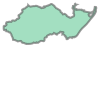

In [35]:
zipcodes_tn.loc[0, 'geometry']

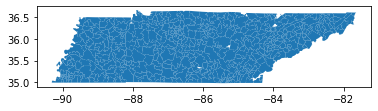

In [36]:
zipcodes_tn.plot();

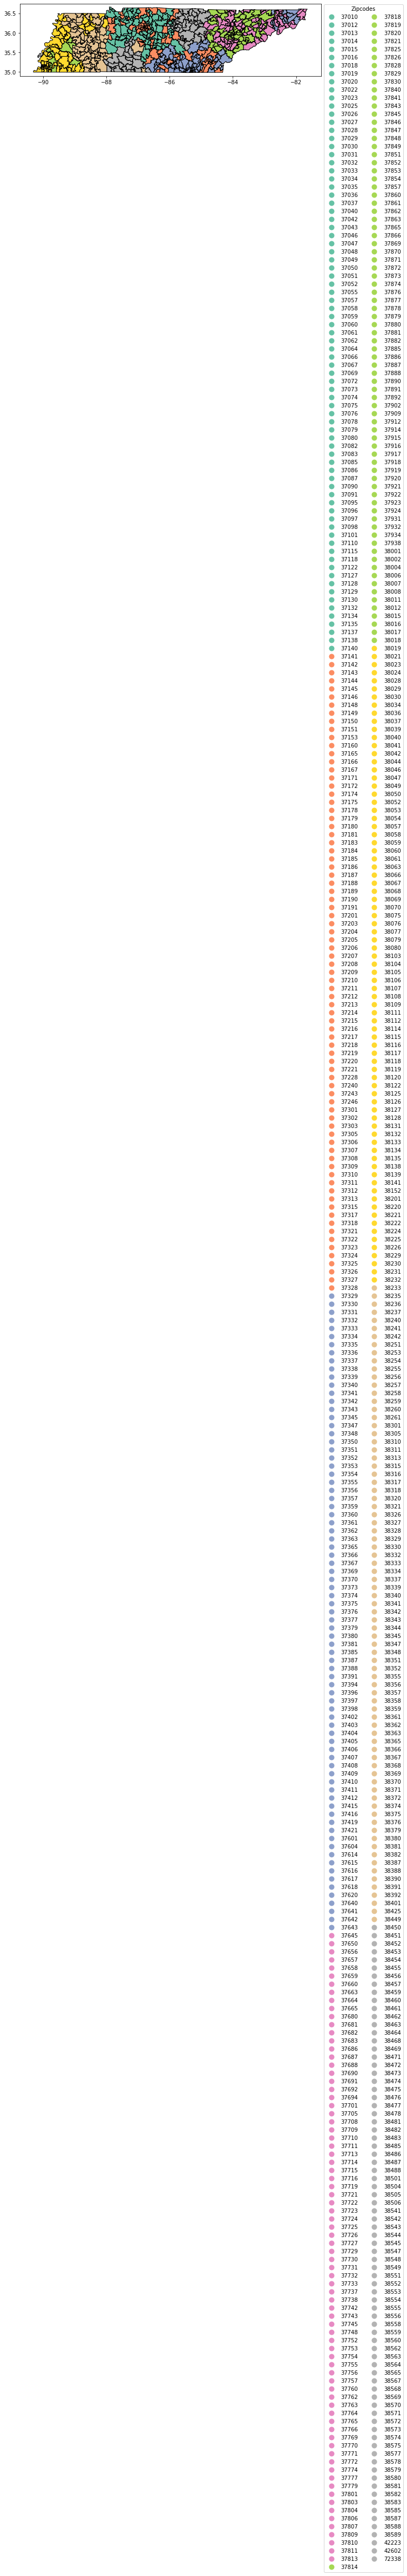

In [37]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes_tn.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [38]:
zipcodes_tn.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
better_health_TN_all_teeth_lost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 750046 to 782727
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        534 non-null    int64  
 1   StateAbbr                   534 non-null    object 
 2   StateDesc                   534 non-null    object 
 3   CityName                    534 non-null    object 
 4   GeographicLevel             534 non-null    object 
 5   DataSource                  534 non-null    object 
 6   Category                    534 non-null    object 
 7   UniqueID                    534 non-null    object 
 8   Measure                     534 non-null    object 
 9   Data_Value_Unit             534 non-null    object 
 10  DataValueTypeID             534 non-null    object 
 11  Data_Value_Type             534 non-null    object 
 12  Data_Value                  520 non-null    float64
 13  Low_Confidence_Limit       

In [40]:
better_health_TN_all_teeth_lost = better_health_TN_all_teeth_lost.replace(to_replace='\(', value="", regex=True)
better_health_TN_all_teeth_lost.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
750046,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065000800,All teeth lost among adults aged >=65 Years,%,...,22.9,NaN,NaN,"1,348","35.0684524247, -85.3130794178)",HLTHOUT,TEETHLOST,4714000.0,4.706500e+10,Teeth Loss
750533,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065011447,All teeth lost among adults aged >=65 Years,%,...,NaN,*,Estimates suppressed for population less than 50,2,"35.081133042, -85.088383777)",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss
750642,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065011323,All teeth lost among adults aged >=65 Years,%,...,16.1,NaN,NaN,"2,436","35.0410360489, -85.1376242788)",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss
750863,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065010700,All teeth lost among adults aged >=65 Years,%,...,NaN,*,Estimates suppressed for population less than 50,4,"35.1040841376, -85.2901543882)",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss
750942,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065002800,All teeth lost among adults aged >=65 Years,%,...,15.3,NaN,NaN,"3,647","35.0175125444, -85.2453135796)",HLTHOUT,TEETHLOST,4714000.0,4.706500e+10,Teeth Loss


In [41]:
better_health_TN_all_teeth_lost = better_health_TN_all_teeth_lost.replace(to_replace='\)', value="", regex=True)
better_health_TN_all_teeth_lost.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
750046,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065000800,All teeth lost among adults aged >=65 Years,%,...,22.9,NaN,NaN,"1,348","35.0684524247, -85.3130794178",HLTHOUT,TEETHLOST,4714000.0,4.706500e+10,Teeth Loss
750533,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065011447,All teeth lost among adults aged >=65 Years,%,...,NaN,*,Estimates suppressed for population less than 50,2,"35.081133042, -85.088383777",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss
750642,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065011323,All teeth lost among adults aged >=65 Years,%,...,16.1,NaN,NaN,"2,436","35.0410360489, -85.1376242788",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss
750863,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065010700,All teeth lost among adults aged >=65 Years,%,...,NaN,*,Estimates suppressed for population less than 50,4,"35.1040841376, -85.2901543882",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss
750942,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065002800,All teeth lost among adults aged >=65 Years,%,...,15.3,NaN,NaN,"3,647","35.0175125444, -85.2453135796",HLTHOUT,TEETHLOST,4714000.0,4.706500e+10,Teeth Loss


In [42]:
better_health_TN_all_teeth_lost = better_health_TN_all_teeth_lost.join(better_health_TN_all_teeth_lost['GeoLocation'].str.split(',', expand=True).add_prefix('sec'))
better_health_TN_all_teeth_lost.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text,sec0,sec1
750046,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065000800,All teeth lost among adults aged >=65 Years,%,...,NaN,"1,348","35.0684524247, -85.3130794178",HLTHOUT,TEETHLOST,4714000.0,4.706500e+10,Teeth Loss,35.0684524247,-85.3130794178
750533,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065011447,All teeth lost among adults aged >=65 Years,%,...,Estimates suppressed for population less than 50,2,"35.081133042, -85.088383777",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss,35.081133042,-85.088383777
750642,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065011323,All teeth lost among adults aged >=65 Years,%,...,NaN,"2,436","35.0410360489, -85.1376242788",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss,35.0410360489,-85.1376242788
750863,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065010700,All teeth lost among adults aged >=65 Years,%,...,Estimates suppressed for population less than 50,4,"35.1040841376, -85.2901543882",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss,35.1040841376,-85.2901543882
750942,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065002800,All teeth lost among adults aged >=65 Years,%,...,NaN,"3,647","35.0175125444, -85.2453135796",HLTHOUT,TEETHLOST,4714000.0,4.706500e+10,Teeth Loss,35.0175125444,-85.2453135796


In [43]:
better_health_TN_all_teeth_lost = better_health_TN_all_teeth_lost.rename(columns = {'sec0':'lat', 'sec1':'lng'})
better_health_TN_all_teeth_lost.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text,lat,lng
750046,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065000800,All teeth lost among adults aged >=65 Years,%,...,NaN,"1,348","35.0684524247, -85.3130794178",HLTHOUT,TEETHLOST,4714000.0,4.706500e+10,Teeth Loss,35.0684524247,-85.3130794178
750533,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065011447,All teeth lost among adults aged >=65 Years,%,...,Estimates suppressed for population less than 50,2,"35.081133042, -85.088383777",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss,35.081133042,-85.088383777
750642,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065011323,All teeth lost among adults aged >=65 Years,%,...,NaN,"2,436","35.0410360489, -85.1376242788",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss,35.0410360489,-85.1376242788
750863,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065010700,All teeth lost among adults aged >=65 Years,%,...,Estimates suppressed for population less than 50,4,"35.1040841376, -85.2901543882",HLTHOUT,TEETHLOST,4714000.0,4.706501e+10,Teeth Loss,35.1040841376,-85.2901543882
750942,2016,TN,Tennessee,Chattanooga,Census Tract,BRFSS,Health Outcomes,4714000-47065002800,All teeth lost among adults aged >=65 Years,%,...,NaN,"3,647","35.0175125444, -85.2453135796",HLTHOUT,TEETHLOST,4714000.0,4.706500e+10,Teeth Loss,35.0175125444,-85.2453135796


In [45]:
better_health_TN_all_teeth_lost['lat'] = better_health_TN_all_teeth_lost['lat'].astype(float)
better_health_TN_all_teeth_lost['lng'] = better_health_TN_all_teeth_lost['lng'].astype(float)

In [46]:
better_health_TN_all_teeth_lost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 750046 to 782727
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        534 non-null    int64  
 1   StateAbbr                   534 non-null    object 
 2   StateDesc                   534 non-null    object 
 3   CityName                    534 non-null    object 
 4   GeographicLevel             534 non-null    object 
 5   DataSource                  534 non-null    object 
 6   Category                    534 non-null    object 
 7   UniqueID                    534 non-null    object 
 8   Measure                     534 non-null    object 
 9   Data_Value_Unit             534 non-null    object 
 10  DataValueTypeID             534 non-null    object 
 11  Data_Value_Type             534 non-null    object 
 12  Data_Value                  520 non-null    float64
 13  Low_Confidence_Limit       